## *EDA In Depth*

*On this chapter ,we will use R-Programming Language in order to conduct descreptive and inferential analysis to analys the data as much as we can to help descion making*

---
---

*A. Install needed libraries*

In [2]:
library(tidyverse)
library(janitor)
library(ggplot2)
library(patchwork)
library(mosaic)
library(skimr)
library(GGally)
library(dlookr)
library(rstatix)
library(ggstatsplot)
library(effectsize)
library(gmodels)
library(ISLR)
library(repr)
options(repr.plot.width=25, repr.plot.height=7);

---
---

*B. Data Set*

In [15]:
df<- read.csv("C:/Users/Omar/Desktop/Omar_Files/Python_Analysis/Siteck_ML/Pepper _Price_Analysis/Data_Sets/data_set_for_stats.csv")

In [16]:
df %>% head()

,week_start_dt,week_end_dt,vietnam_season,p_color,price,total_volume,brazil,india,vietnam,indonesia,china,brazil_season,indonesia_season,india_season,china_season,jordan_max_price,jordan_min_price,demand,supply
,<chr>,<chr>,<int>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
1,2015-12-28,2016-01-03,2,green,6.599075,1596040,10793.5,65658.1,1519589,0,0,False,False,False,False,6.625,6.325,0.50,0.1650
2,2015-12-28,2016-01-03,2,red,7.175335,1596040,10793.5,65658.1,1519589,0,0,False,False,False,False,7.525,7.125,0.51,0.1683
3,2015-12-28,2016-01-03,2,yellow,7.300575,1596040,10793.5,65658.1,1519589,0,0,False,False,False,False,7.425,7.025,16.55,5.4615
4,2016-01-04,2016-01-10,2,yellow,7.379675,2295578,5677.8,15274.4,2274626,0,0,False,False,False,False,7.525,7.025,271.16,89.4828
5,2016-01-04,2016-01-10,2,red,7.175335,2295578,5677.8,15274.4,2274626,0,0,False,False,False,False,7.625,7.125,42.33,13.9689
6,2016-01-04,2016-01-10,2,green,6.599075,2295578,5677.8,15274.4,2274626,0,0,False,False,False,False,6.625,6.325,0.58,0.1914


---

*B.1. Na Values*

In [17]:
df  %>% is.na() %>% sum()

[1] 0

---

*B.2. data types*

In [19]:
df %>% glimpse()

Rows: 1,215
Columns: 19
$ week_start_dt    <chr> "2015-12-28", "2015-12-28", "2015-12-28", "2016-01-04…
$ week_end_dt      <chr> "2016-01-03", "2016-01-03", "2016-01-03", "2016-01-10…
$ vietnam_season   <int> 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,…
$ p_color          <chr> "green", "red", "yellow", "yellow", "red", "green", "…
$ price            <dbl> 6.599075, 7.175335, 7.300575, 7.379675, 7.175335, 6.5…
$ total_volume     <dbl> 1596040, 1596040, 1596040, 2295578, 2295578, 2295578,…
$ brazil           <dbl> 10793.5, 10793.5, 10793.5, 5677.8, 5677.8, 5677.8, 26…
$ india            <dbl> 65658.1, 65658.1, 65658.1, 15274.4, 15274.4, 15274.4,…
$ vietnam          <dbl> 1519589, 1519589, 1519589, 2274626, 2274626, 2274626,…
$ indonesia        <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,…
$ china            <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,…
$ brazil_season    <chr> "False", "False", "False", "False", "False", "False",…
$ indonesia_seas

---

*B.3. converting (week_start_dt,week_end_dt) to date factors,converting (vietnam_season,p_color,brazil_season,
,india_season,china_season) to factors*

In [22]:
df$week_start_dt<-as.Date.factor(df$week_start_dt);
df$week_end_dt<-as.Date.factor(df$week_end_dt)

In [26]:
df$vietnam_season<-as.factor(df$vietnam_season);
df$p_color<-as.factor(df$p_color);
df$india_season<-as.factor(df$india_season);
df$china_season<-as.factor(df$china_season);
df$brazil_season<-as.factor(df$brazil_season);
df$vietnam_season<-as.factor(df$vietnam_season);
df$indonesia_season<-as.factor(df$indonesia_season);

* *Confirm our changings*

In [27]:
df %>% glimpse()

Rows: 1,215
Columns: 19
$ week_start_dt    <date> 2015-12-28, 2015-12-28, 2015-12-28, 2016-01-04, 2016…
$ week_end_dt      <date> 2016-01-03, 2016-01-03, 2016-01-03, 2016-01-10, 2016…
$ vietnam_season   <fct> 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,…
$ p_color          <fct> green, red, yellow, yellow, red, green, yellow, red, …
$ price            <dbl> 6.599075, 7.175335, 7.300575, 7.379675, 7.175335, 6.5…
$ total_volume     <dbl> 1596040, 1596040, 1596040, 2295578, 2295578, 2295578,…
$ brazil           <dbl> 10793.5, 10793.5, 10793.5, 5677.8, 5677.8, 5677.8, 26…
$ india            <dbl> 65658.1, 65658.1, 65658.1, 15274.4, 15274.4, 15274.4,…
$ vietnam          <dbl> 1519589, 1519589, 1519589, 2274626, 2274626, 2274626,…
$ indonesia        <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,…
$ china            <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,…
$ brazil_season    <fct> False, False, False, False, False, False, False, Fals…
$ indonesia_seas

---
---

*C. Analysis*

*C.1. Quick Data Summary*

In [29]:
df  %>% summary()

 week_start_dt         week_end_dt         vietnam_season   p_color   
 Min.   :2015-12-28   Min.   :2016-01-03   1:414          green :405  
 1st Qu.:2017-12-04   1st Qu.:2017-12-10   2:486          red   :405  
 Median :2019-11-11   Median :2019-11-17   3:315          yellow:405  
 Mean   :2019-11-11   Mean   :2019-11-17                              
 3rd Qu.:2021-10-18   3rd Qu.:2021-10-24                              
 Max.   :2023-09-25   Max.   :2023-10-01                              
     price         total_volume         brazil           india       
 Min.   : 6.300   Min.   : 325471   Min.   :     0   Min.   :     0  
 1st Qu.: 7.000   1st Qu.:1938246   1st Qu.: 10609   1st Qu.:     0  
 Median : 7.600   Median :2254902   Median :175493   Median :     0  
 Mean   : 8.009   Mean   :2244701   Mean   :245303   Mean   : 28744  
 3rd Qu.: 8.601   3rd Qu.:2541123   3rd Qu.:443551   3rd Qu.: 31023  
 Max.   :14.085   Max.   :3555979   Max.   :877648   Max.   :348997  
    vietnam  

In [53]:
my_thems=theme(text = element_text(size = 30),
      plot.subtitle = element_text(size = 30),
      legend.title = element_text(size = 30),
      legend.text = element_text(size = 30),
      axis.text.x = element_text(size = 30)
      )
count_label<-geom_text(aes(label = ..count..), stat = "count", vjust = 1.5, colour = "black",size=10)

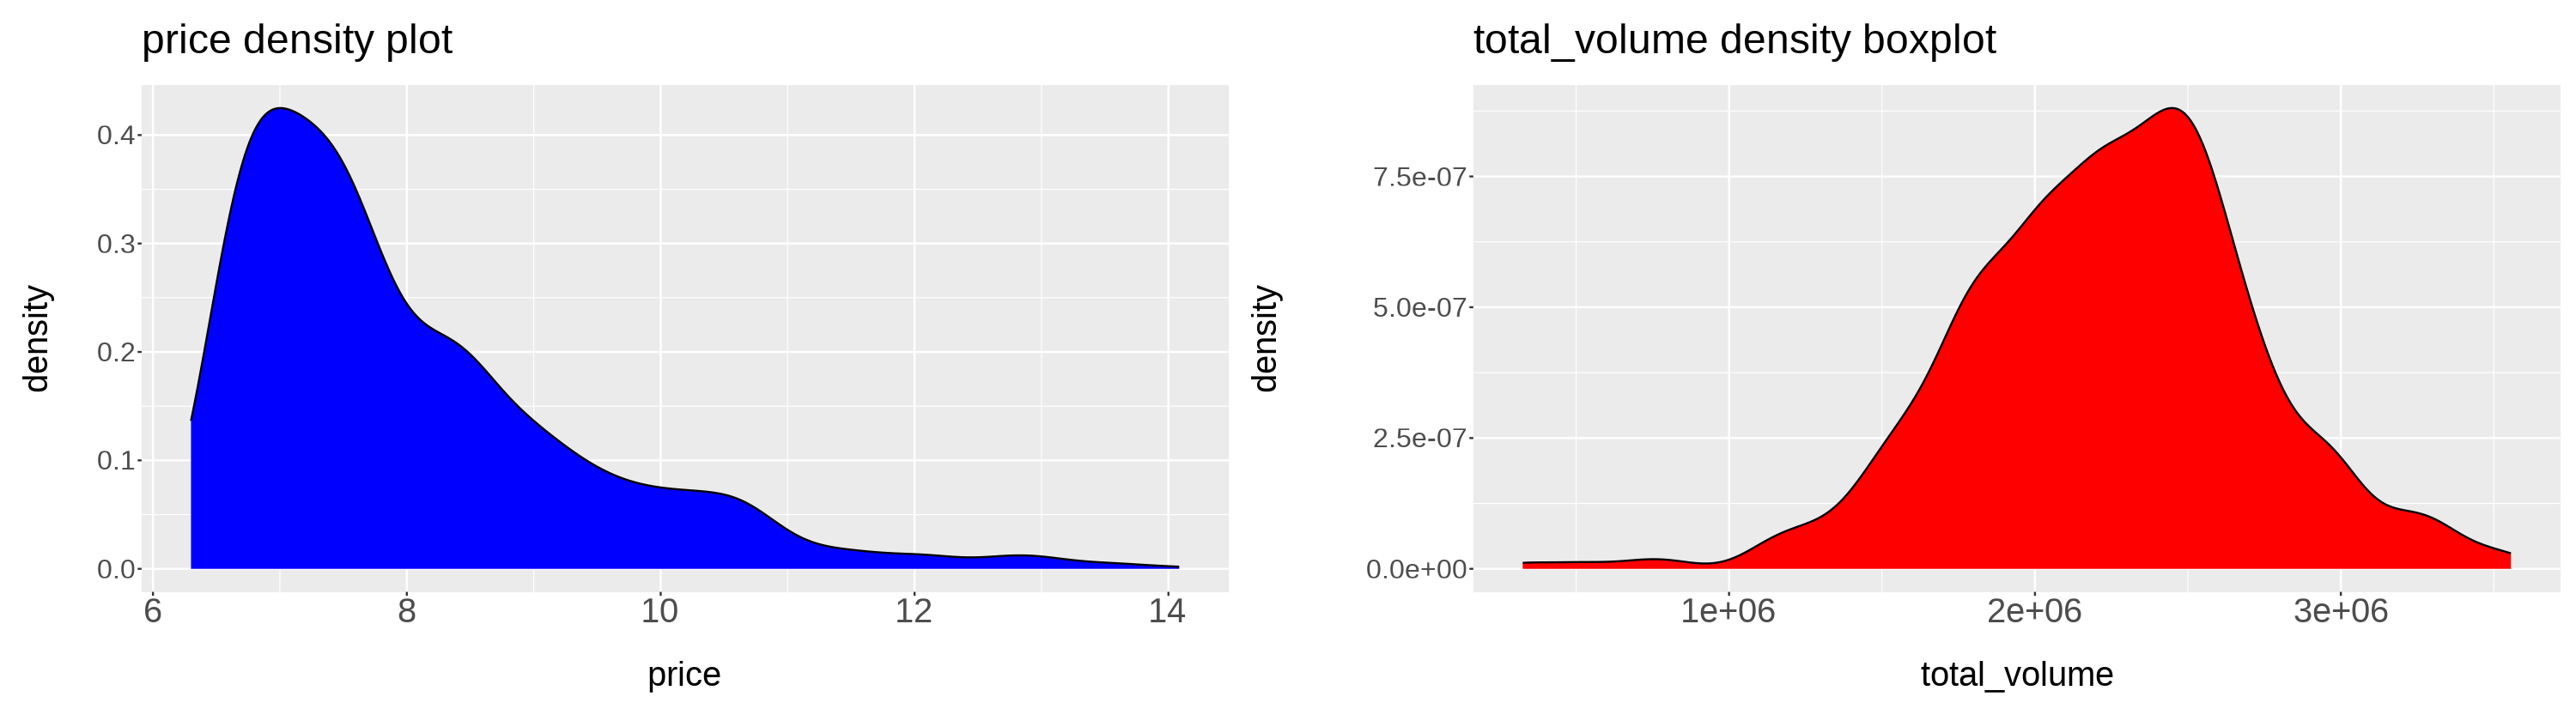

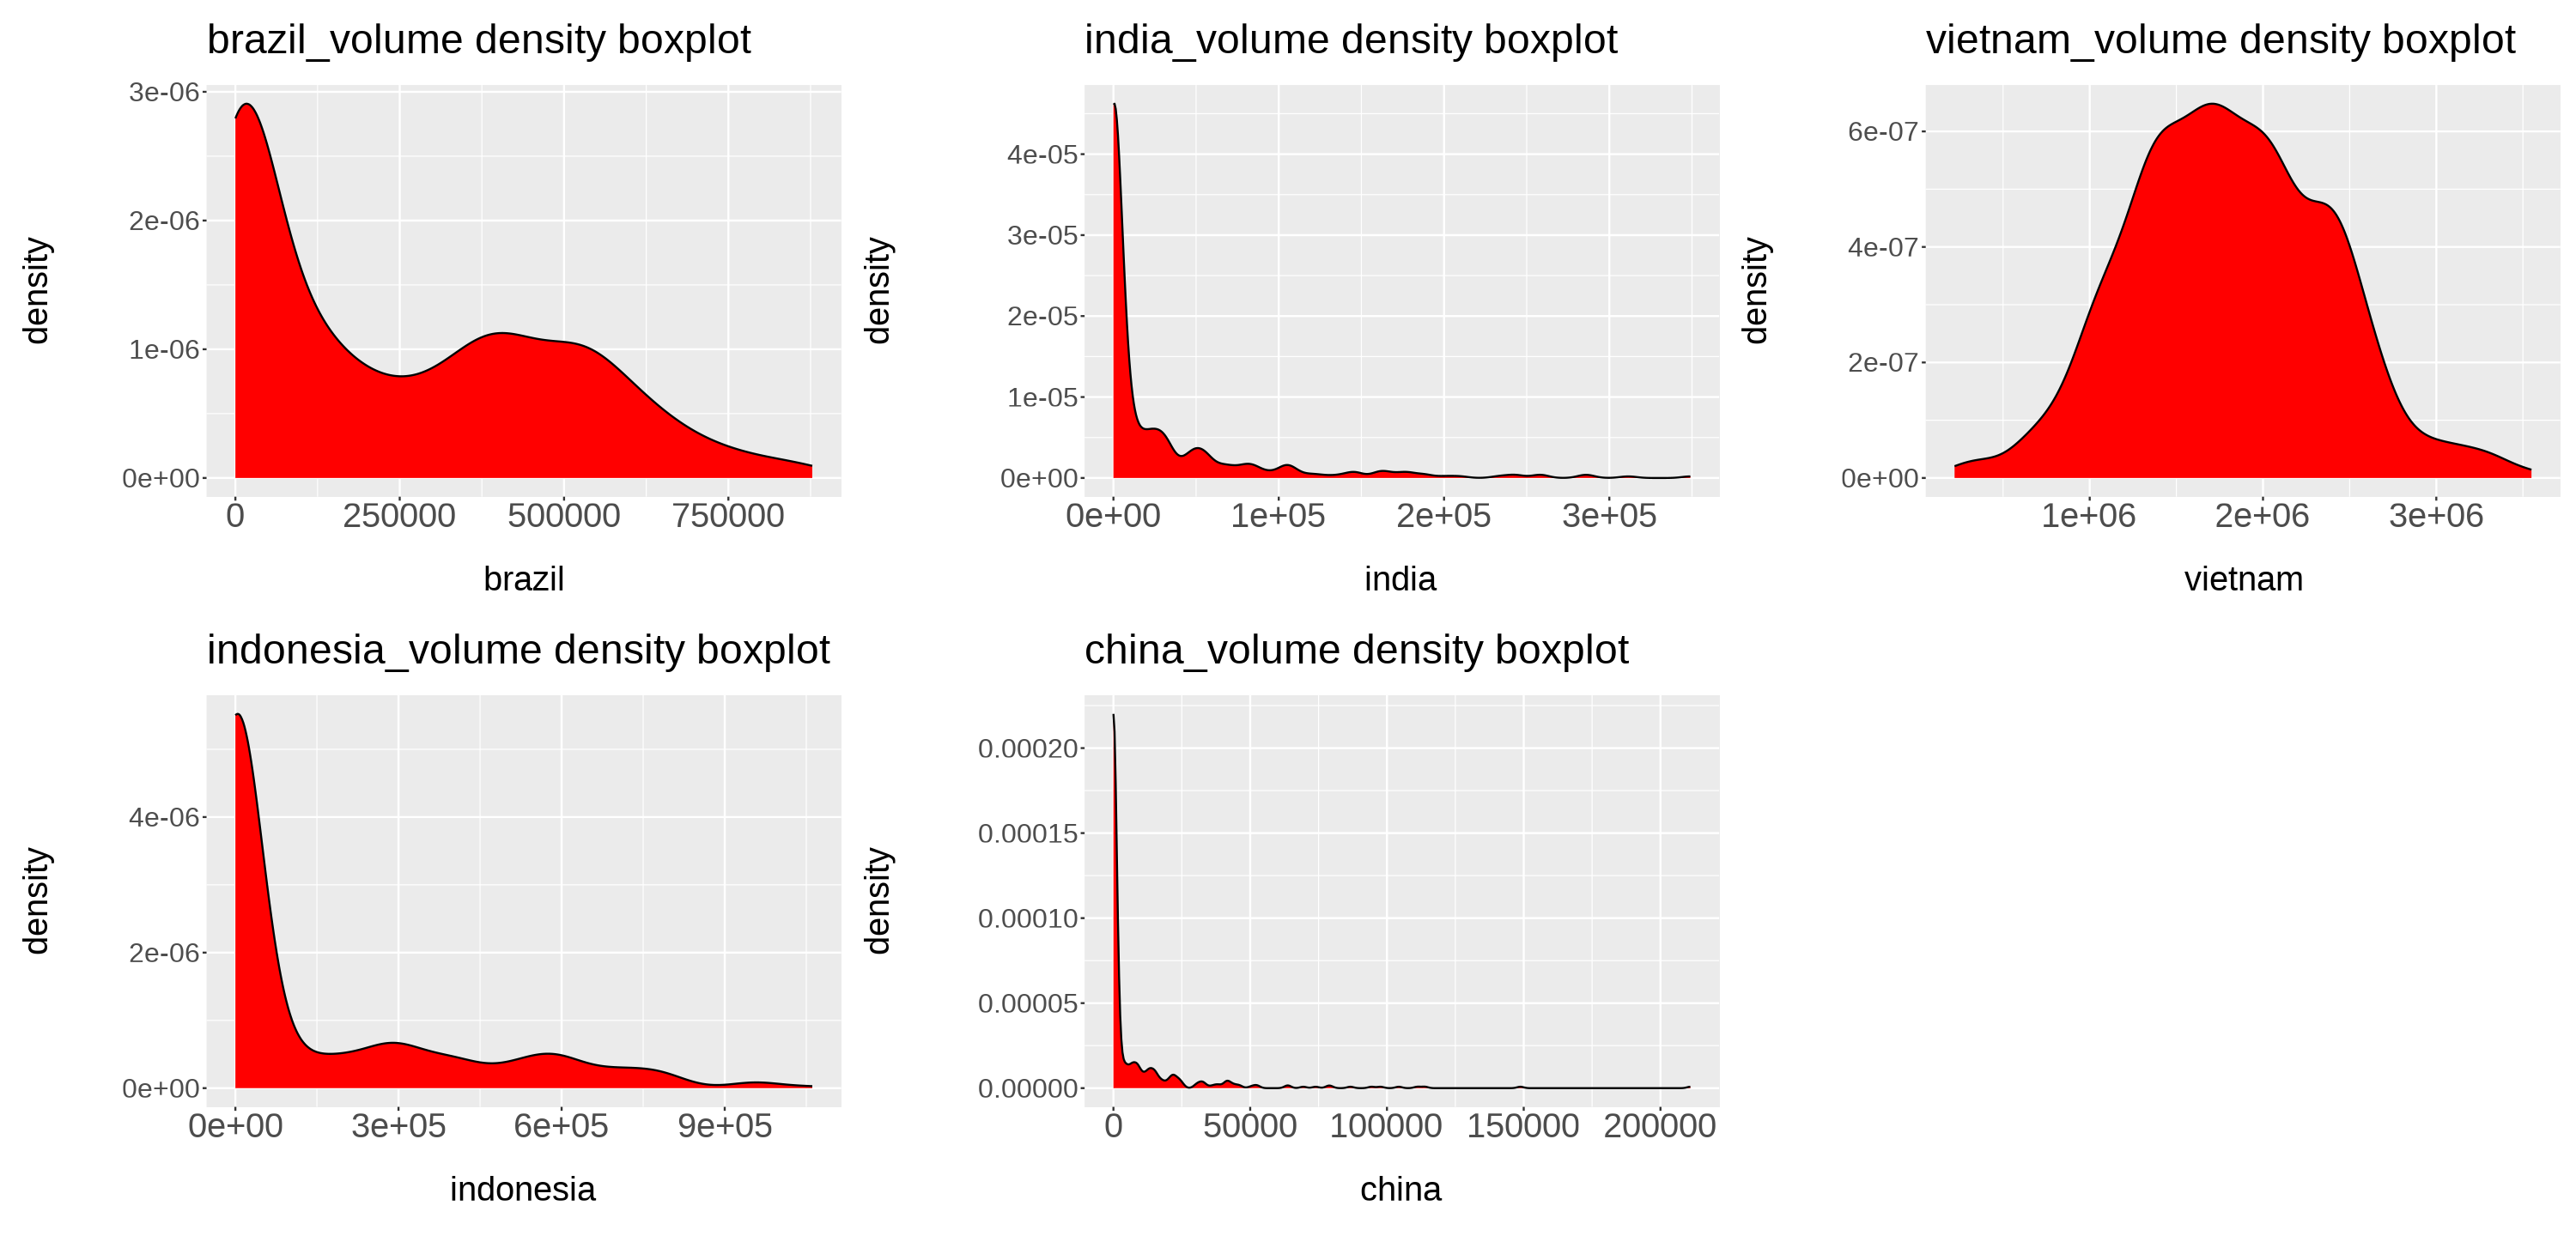

In [39]:
options(repr.plot.width=25, repr.plot.height=7);
df %>%  ggplot(aes(x=price))+geom_density(fill="blue")+ggtitle("price density plot")+my_thems+
df %>%  ggplot(aes(x=total_volume))+geom_density(fill="red")+ggtitle("total_volume density boxplot")+my_thems
options(repr.plot.width=25, repr.plot.height=12);
df %>%  ggplot(aes(x=brazil))+geom_density(fill="red")+ggtitle("brazil_volume density boxplot")+my_thems+
df %>%  ggplot(aes(x=india))+geom_density(fill="red")+ggtitle("india_volume density boxplot")+my_thems+
df %>%  ggplot(aes(x=vietnam))+geom_density(fill="red")+ggtitle("vietnam_volume density boxplot")+my_thems+
df %>%  ggplot(aes(x=indonesia))+geom_density(fill="red")+ggtitle("indonesia_volume density boxplot")+my_thems+
df %>%  ggplot(aes(x=china))+geom_density(fill="red")+ggtitle("china_volume density boxplot")+my_thems

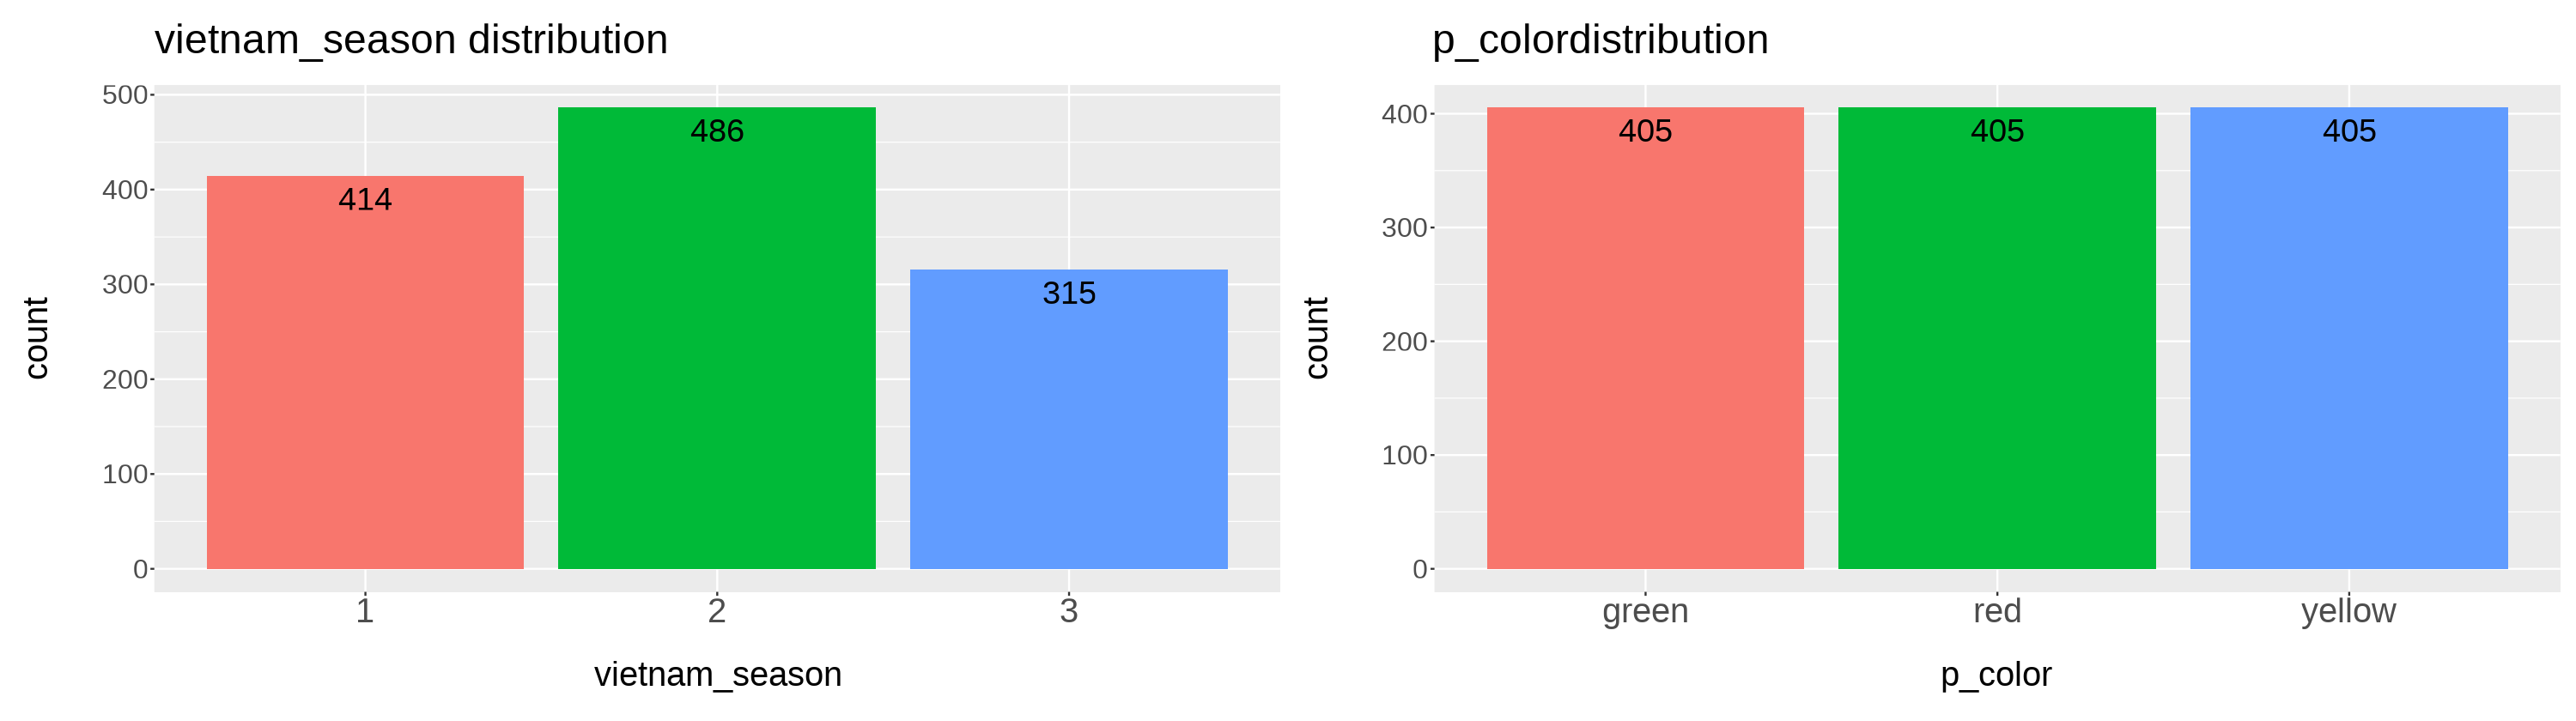

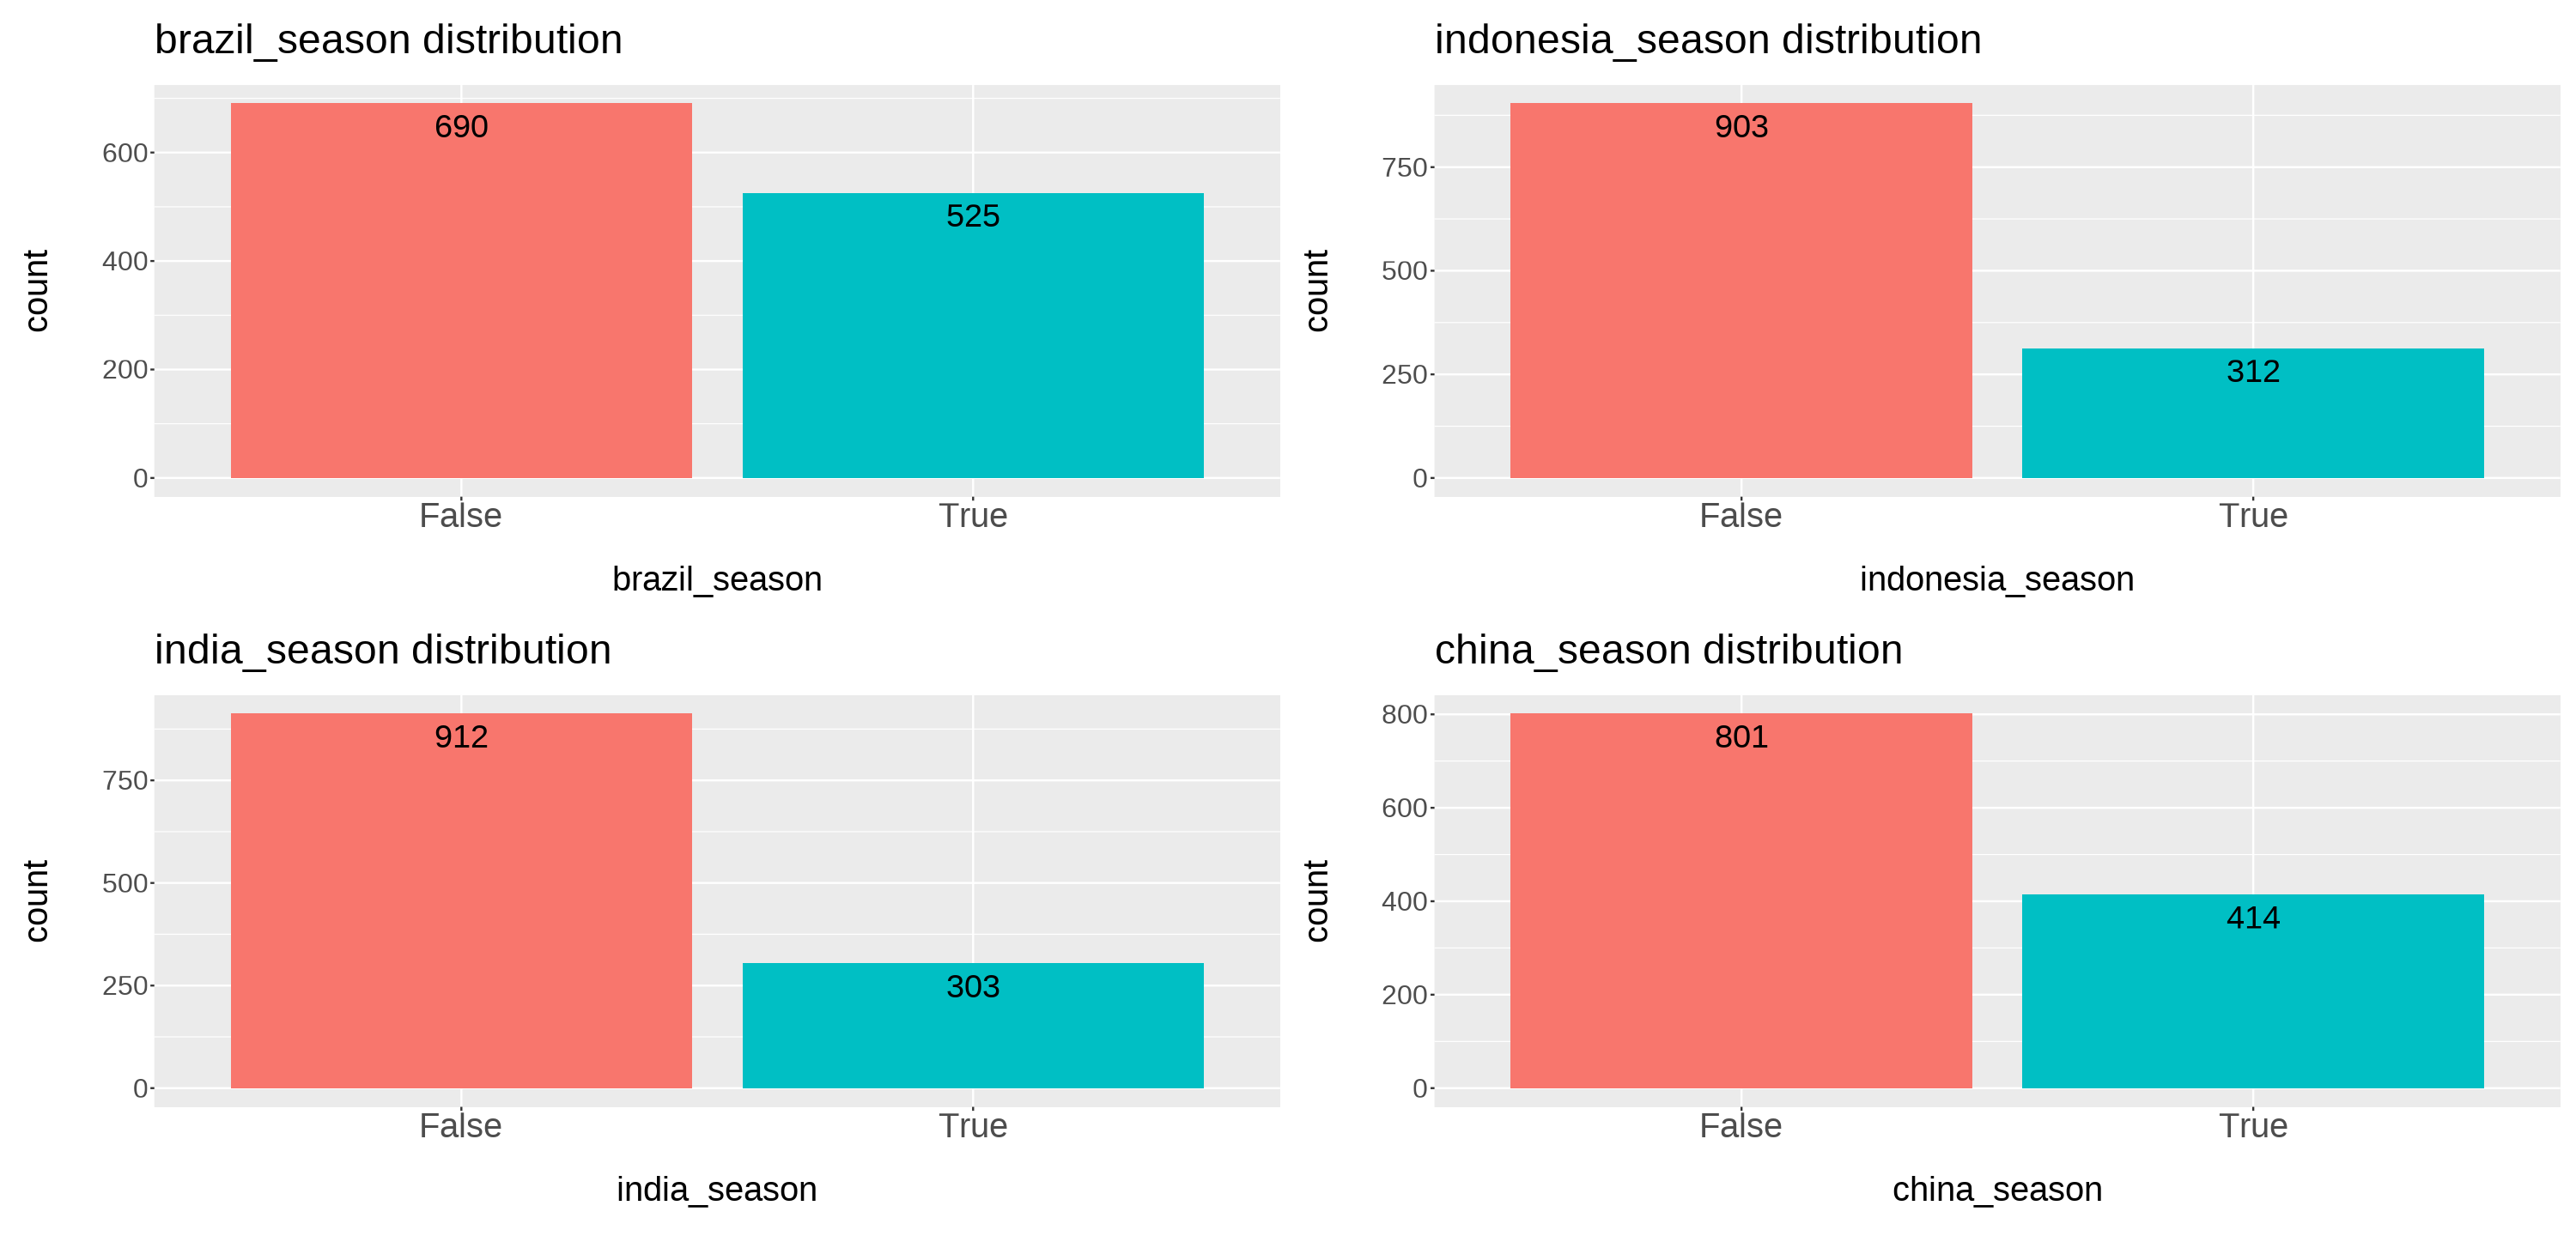

In [52]:
options(repr.plot.width=25, repr.plot.height=7);
df  %>% ggplot(aes(x = vietnam_season,fill=vietnam_season))+geom_bar(show.legend = FALSE)+ggtitle("vietnam_season distribution")+count_label+my_thems+
df  %>% ggplot(aes(x = p_color,fill=p_color))+geom_bar(show.legend = FALSE)+ggtitle("p_colordistribution")+count_label+my_thems
options(repr.plot.width=25, repr.plot.height=12);
df  %>% ggplot(aes(x = brazil_season,fill=brazil_season))+geom_bar(show.legend = FALSE)+ggtitle("brazil_season distribution")+count_label+my_thems+
df  %>% ggplot(aes(x = indonesia_season,fill=indonesia_season))+geom_bar(show.legend = FALSE)+ggtitle("indonesia_season distribution")+count_label+my_thems+
df  %>% ggplot(aes(x = india_season,fill=india_season))+geom_bar(show.legend = FALSE)+ggtitle("india_season distribution")+count_label+my_thems+
df  %>% ggplot(aes(x = china_season,fill=china_season))+geom_bar(show.legend = FALSE)+ggtitle("china_season distribution")+count_label+my_thems

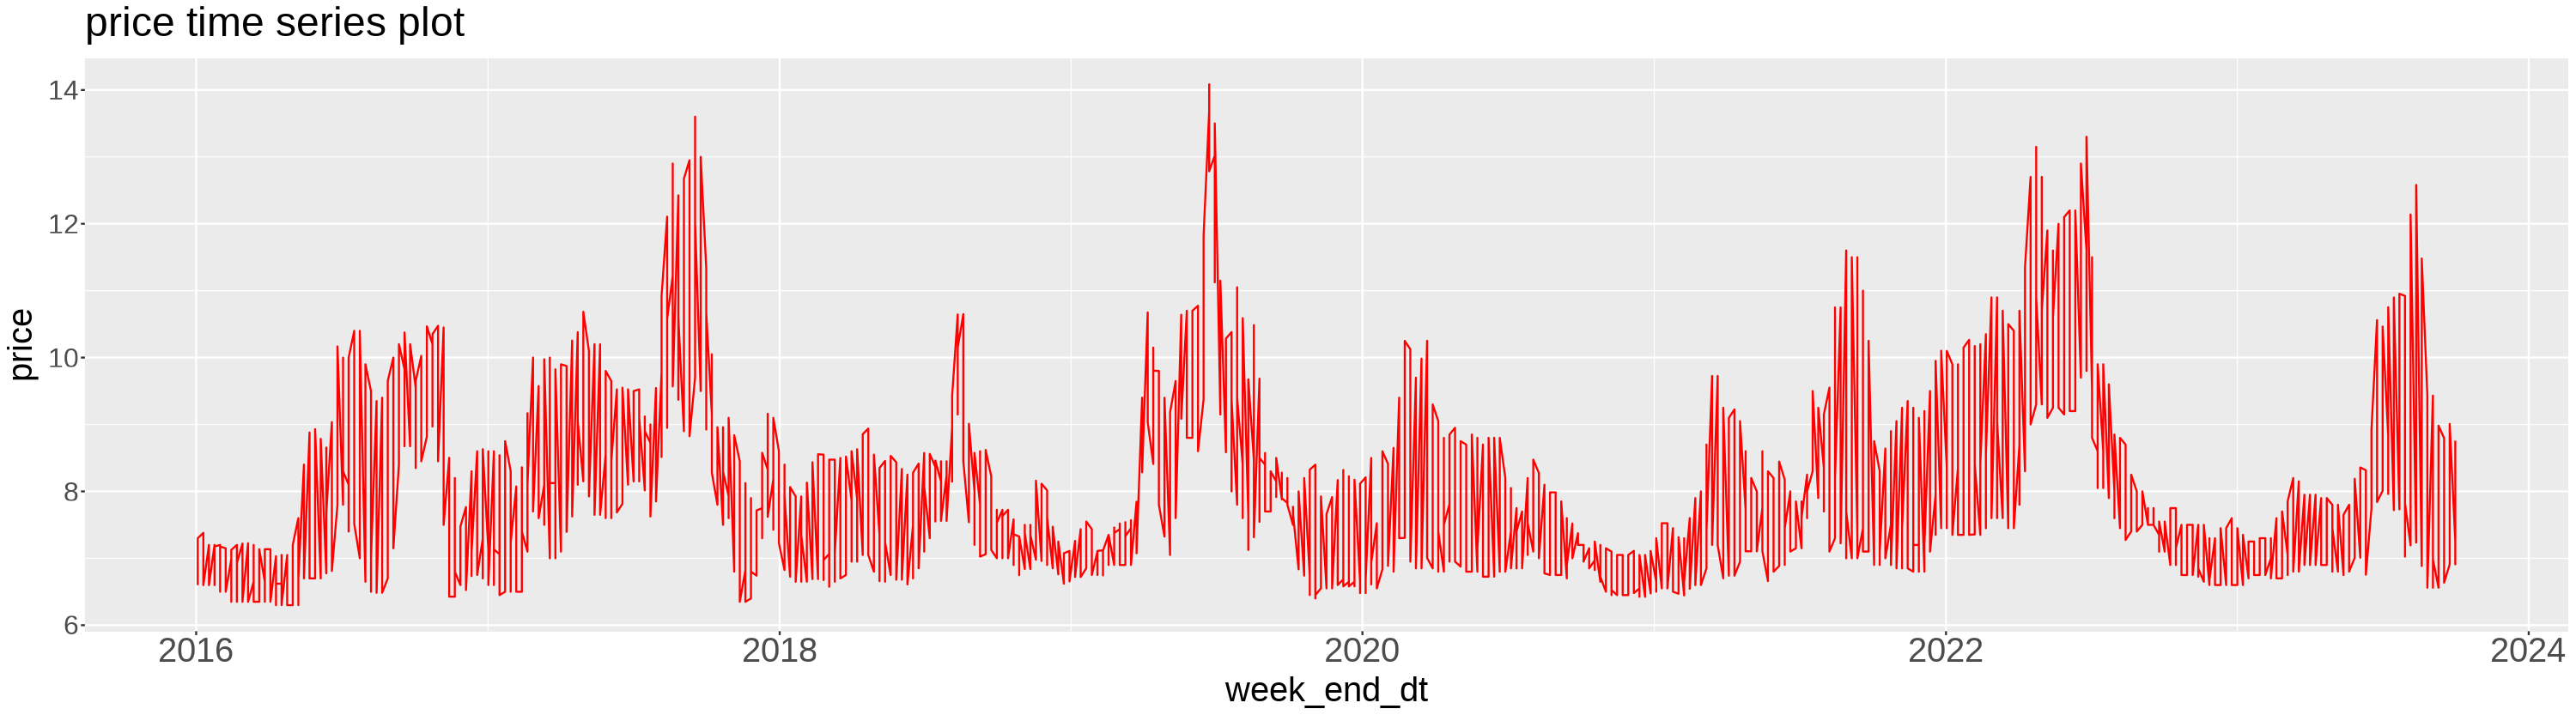

In [56]:
options(repr.plot.width=25, repr.plot.height=7);
df %>% ggplot(aes(x=week_end_dt,y = price))+geom_line(color="red")+ggtitle("price time series plot")+my_thems

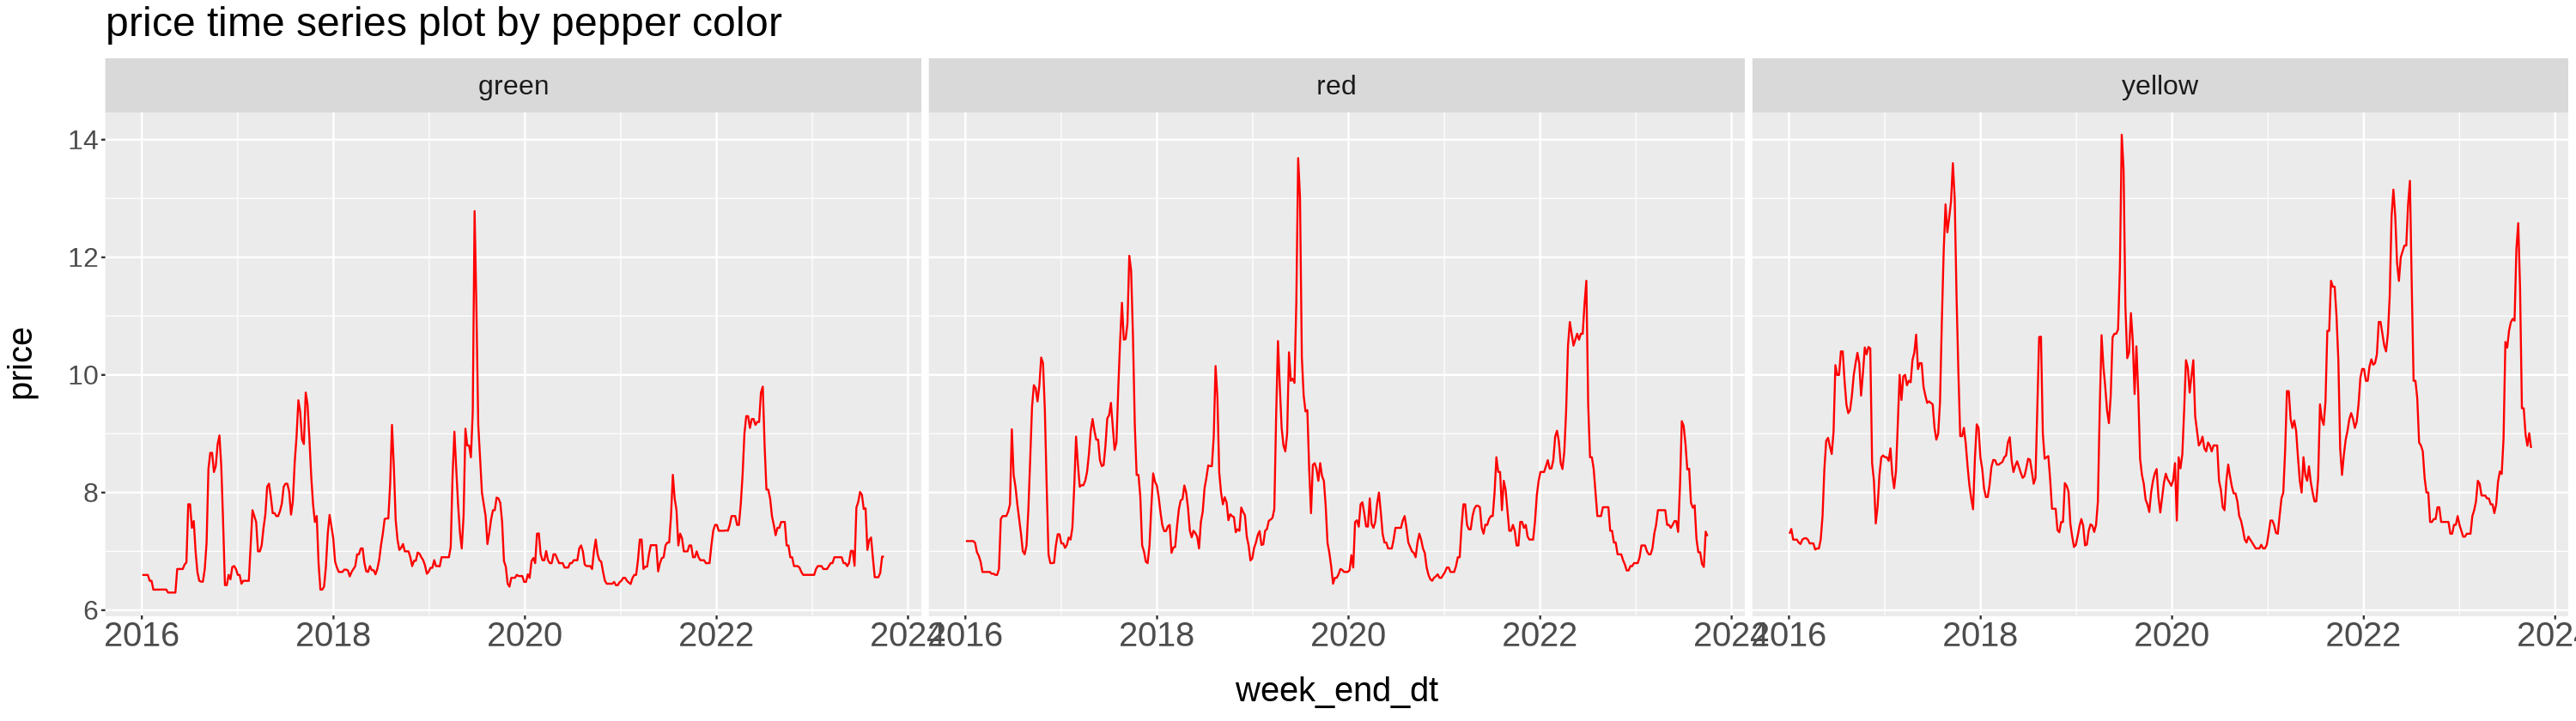

In [60]:
options(repr.plot.width=25, repr.plot.height=7);
df %>% ggplot(aes(x=week_end_dt,y = price))+geom_line(color="red")+ggtitle("price time series plot by pepper color")+facet_wrap(~p_color)+my_thems

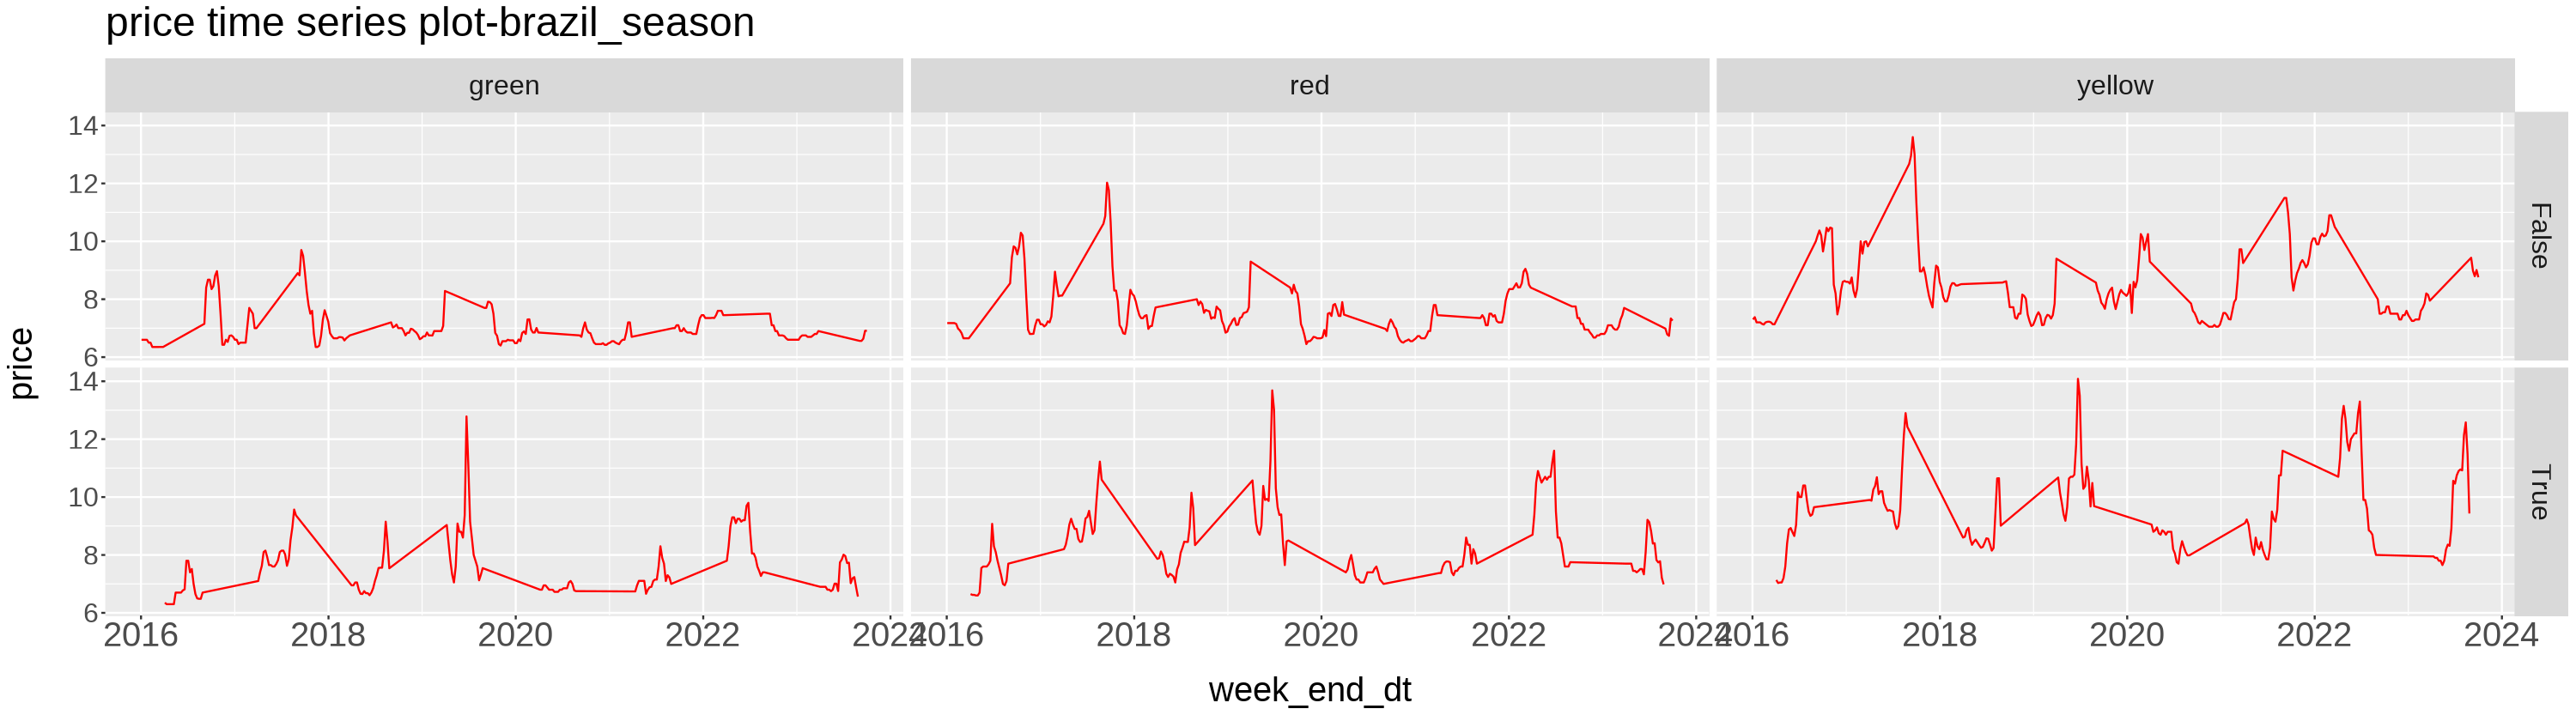

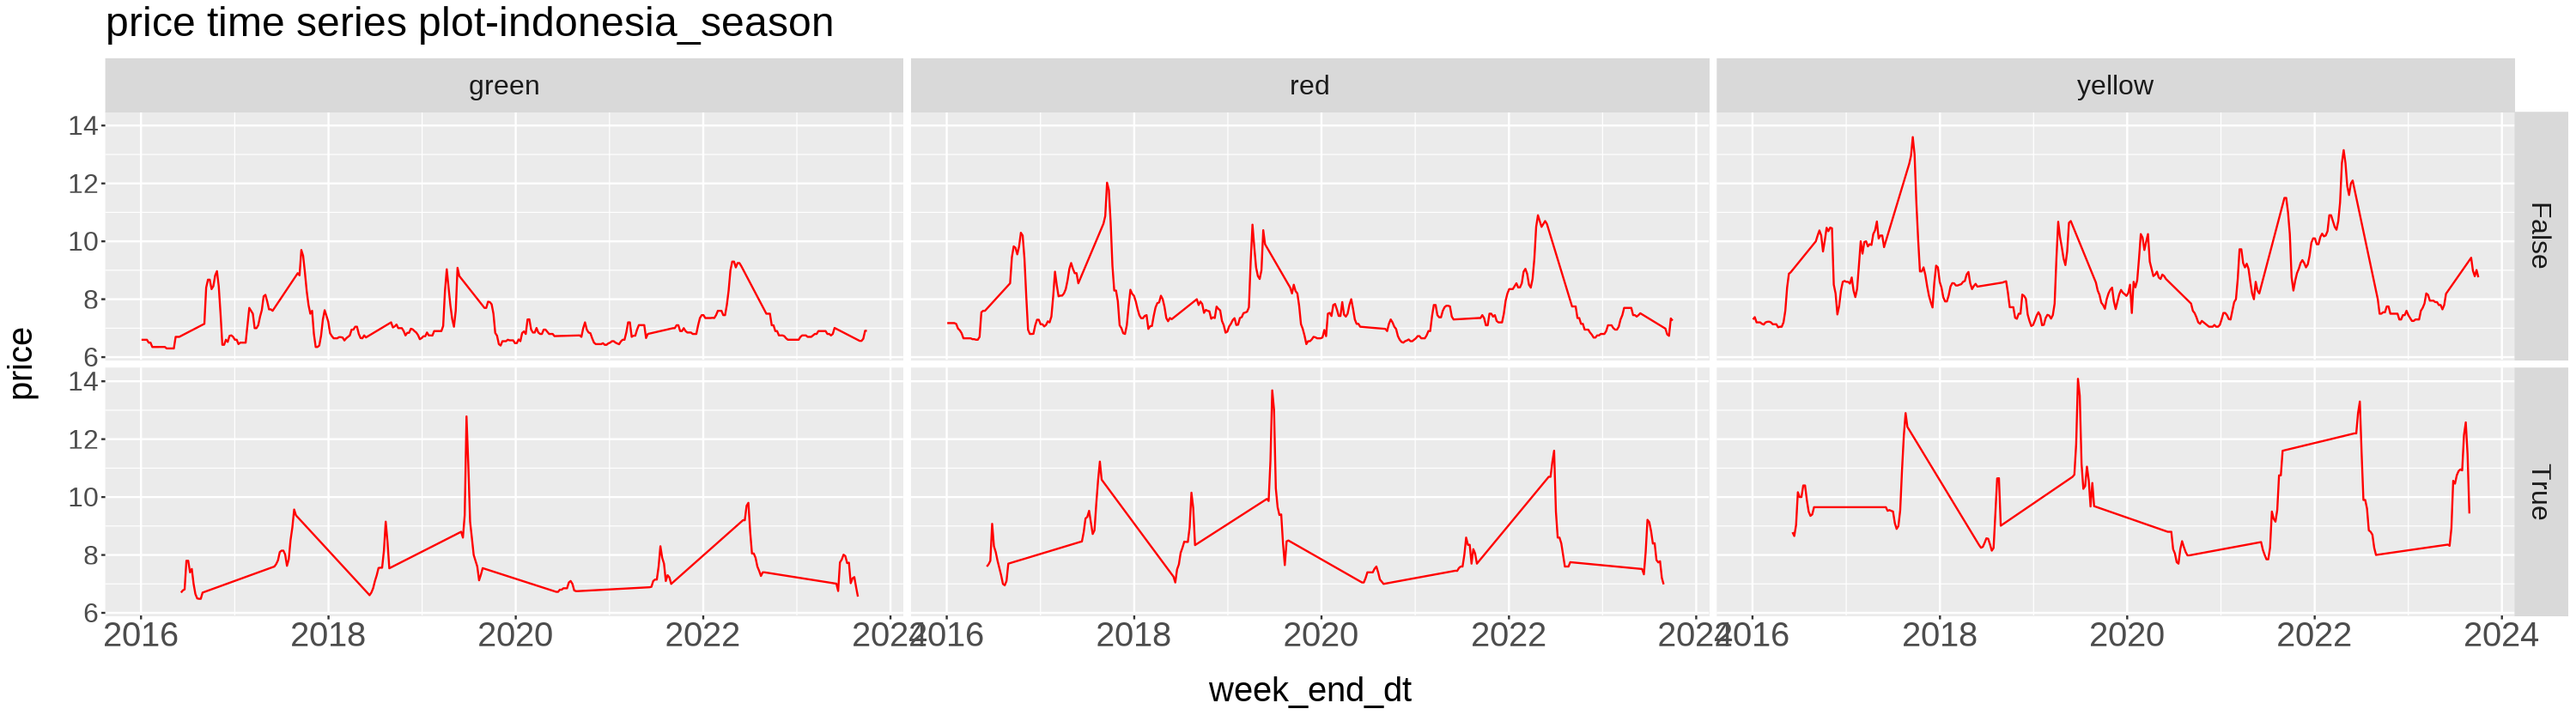

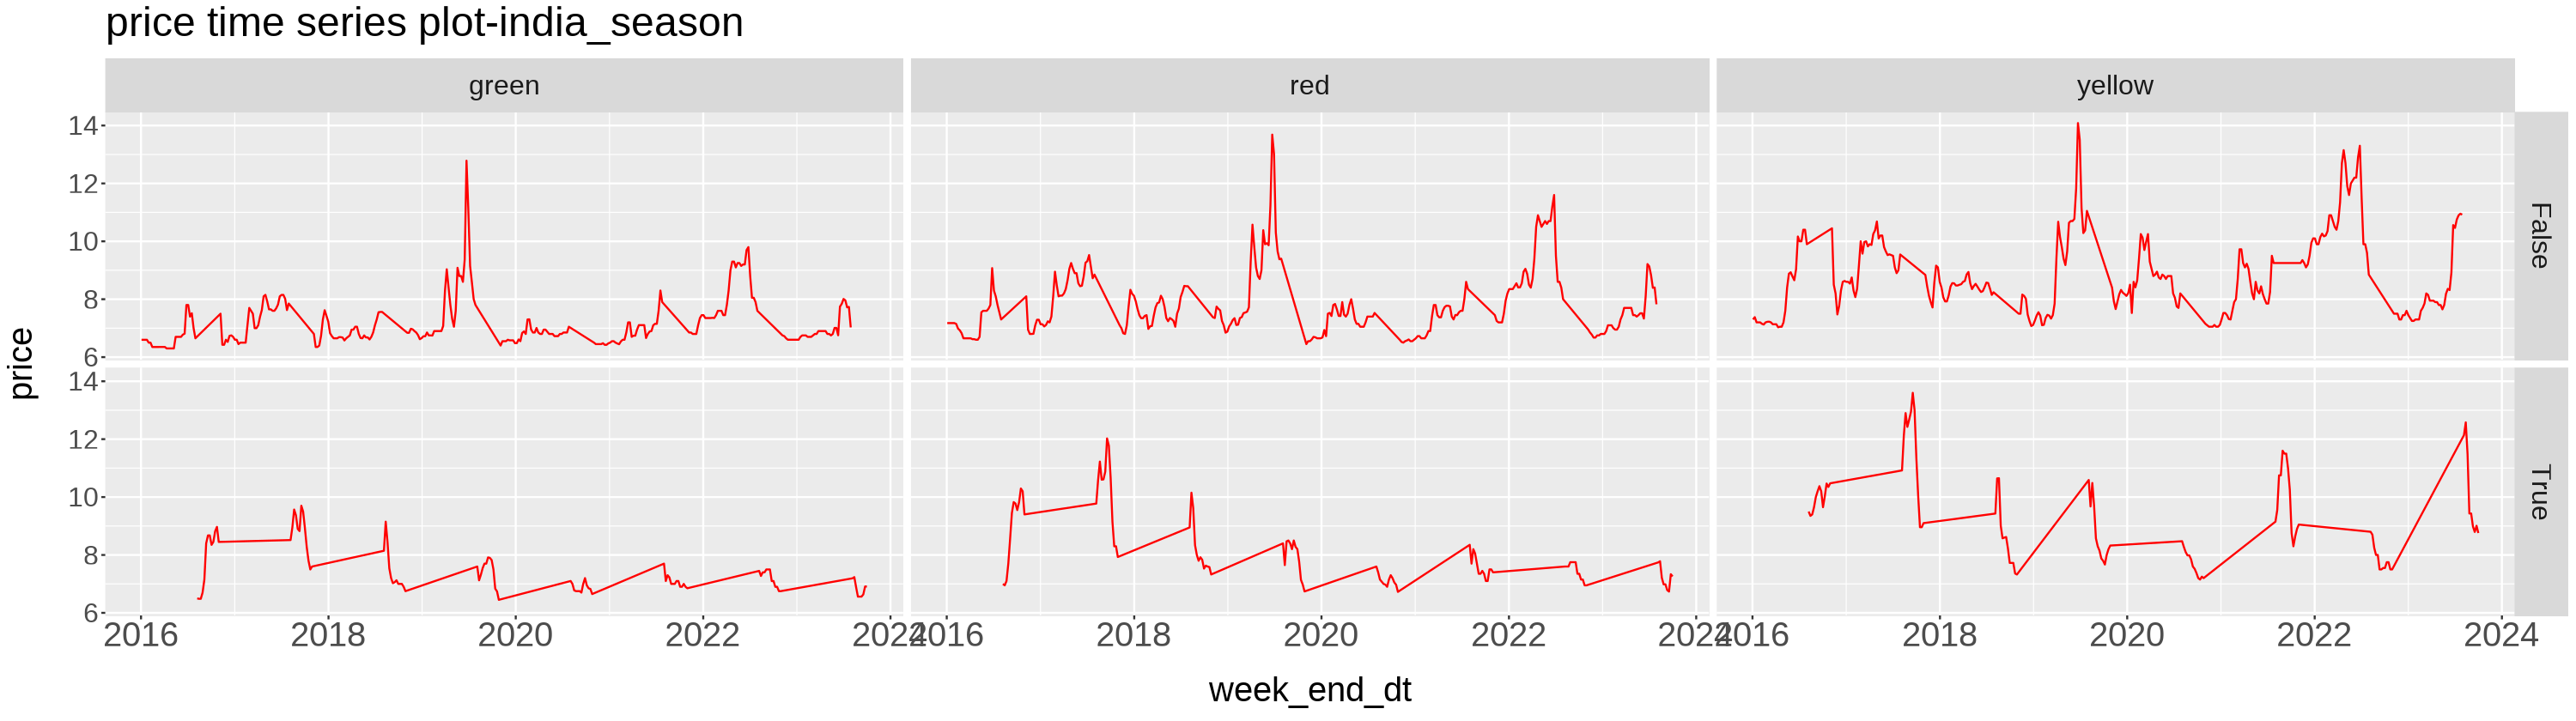

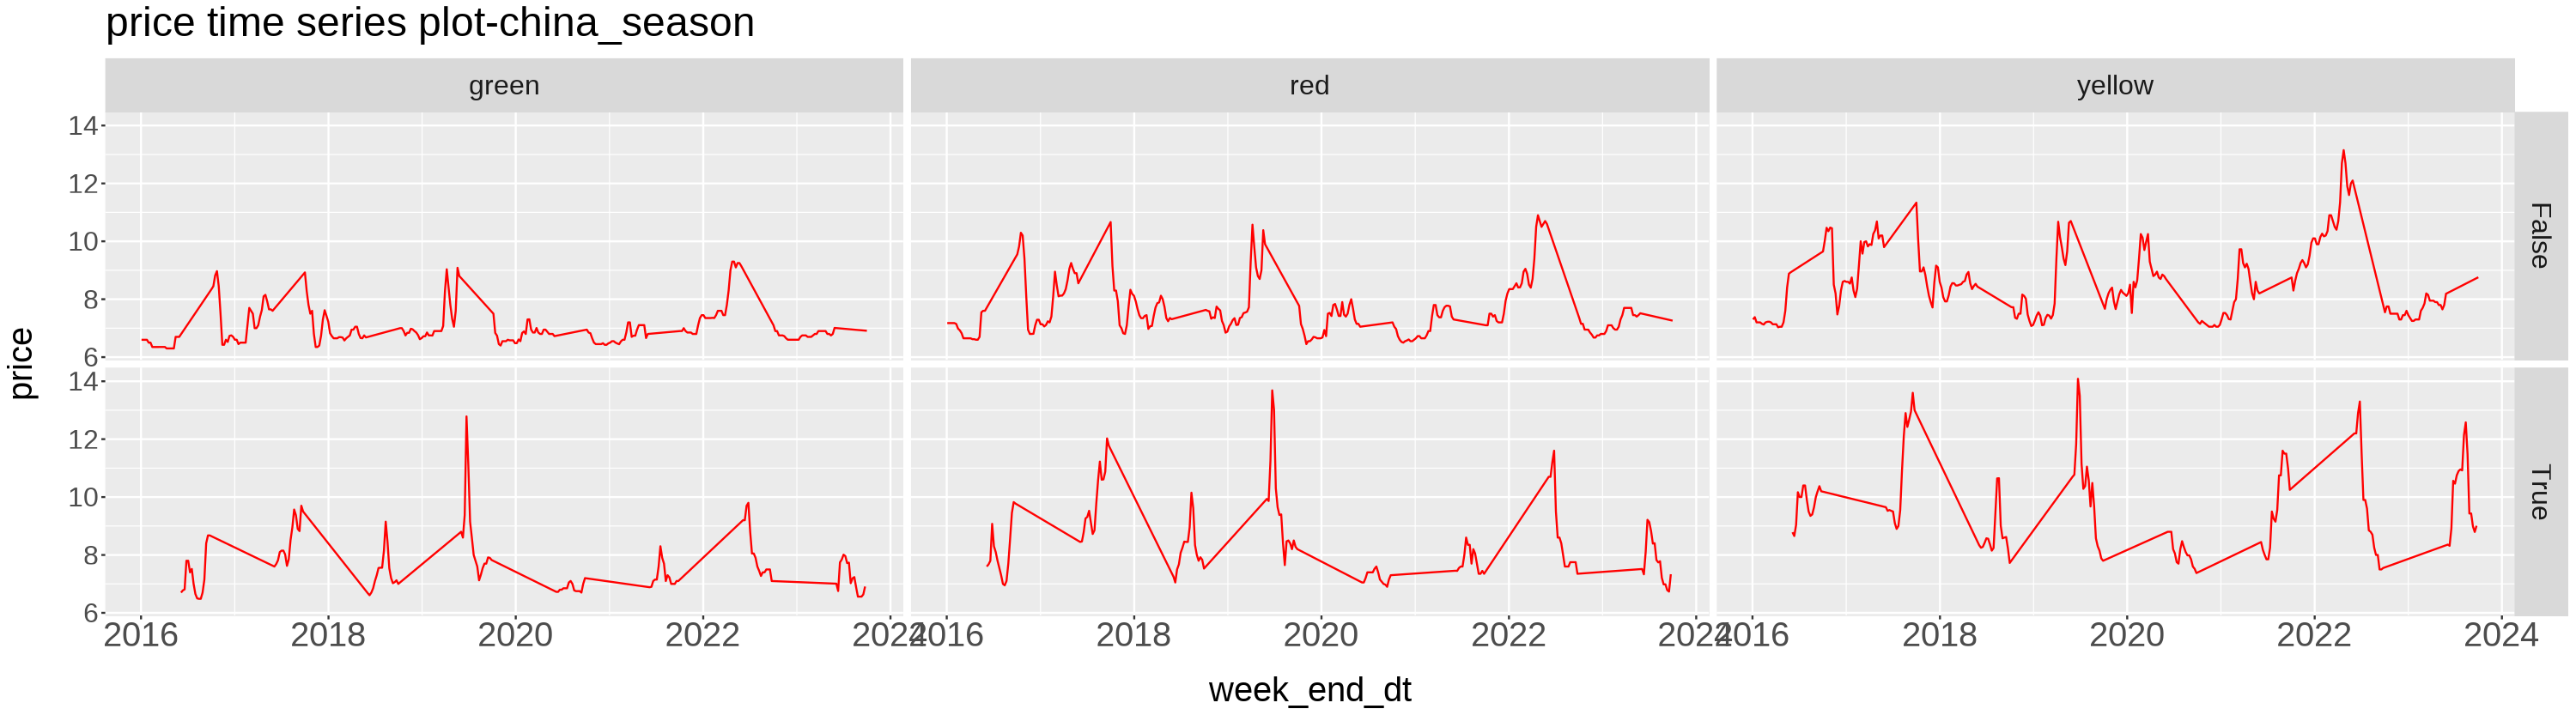

In [67]:
options(repr.plot.width=25, repr.plot.height=7);
df %>% ggplot(aes(x=week_end_dt,y = price))+geom_line(color="red")+ggtitle("price time series plot-brazil_season")+facet_grid(brazil_season~p_color)+my_thems
df %>% ggplot(aes(x=week_end_dt,y = price))+geom_line(color="red")+ggtitle("price time series plot-indonesia_season")+facet_grid(indonesia_season~p_color)+my_thems
df %>% ggplot(aes(x=week_end_dt,y = price))+geom_line(color="red")+ggtitle("price time series plot-india_season")+facet_grid(india_season~p_color)+my_thems
df %>% ggplot(aes(x=week_end_dt,y = price))+geom_line(color="red")+ggtitle("price time series plot-china_season")+facet_grid(china_season~p_color)+my_thems

---

*C.2. Interential Anaysis*

*normality check :*<br>
*normality Test: - A formal statistical test for normality - The null hypothesis states that the data follows a normal distribution shape*

In [70]:
df %>% select(price,total_volume,brazil,india,vietnam,indonesia,china)  %>%  normality()

vars,statistic,p_value,sample
<chr>,<dbl>,<dbl>,<dbl>
price,0.8771227,6.510843e-30,1215
total_volume,0.9904102,4.008798e-07,1215
brazil,0.8800461,1.288483e-29,1215
india,0.5834130,5.488199e-47,1215
vietnam,0.9962566,4.840132e-03,1215
indonesia,0.6933827,2.527380e-42,1215
china,0.4481965,1.738813e-51,1215
